A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


**Data Dictionary for Market Segmentation:**

1.	**spending:** Amount spent by the customer per month (in 1000s)

2.	**advance_payments:** Amount paid by the customer in advance by cash (in 100s)

3.	**probability_of_full_payment:** Probability of payment done in full by the customer to the bank

4.	**current_balance:** Balance amount left in the account to make purchases (in 1000s)

5.	**credit_limit:** Limit of the amount in credit card (10000s)

6.	**min_payment_amt :** minimum paid by the customer while making payments for purchases made monthly (in 100s)

7.	**max_spent_in_single_shopping:** Maximum amount spent in one purchase (in 1000s)


### Importing Necessary Libraries

In [204]:
import numpy as np                 # for Numerical Calculation                                            
import pandas as pd                # for Dataframe Manupulation                                          
import seaborn as sns; sns.set()   # for Visualisation
import matplotlib.pyplot as plt    # for Visualisation
%matplotlib inline

import scipy as stats              # statistical calculations
import warnings
warnings.filterwarnings('ignore')


#### Loading of data

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

## **1.1** Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### Checking of the Data

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


#### Observation
Data looks good based on records seen in top 5 and bottom 5.

### Exploratory Data Analysis

In [5]:
df.shape # checking dimensions

(210, 7)

In [6]:
df.info() # checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### Observation

**1.** Total 7 variable are their.

**2.** No null values in the variables.

**3.** All variables are of integer type (float64).

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


#### Observation 

**(a)** Outliers are their in:

       1. probability_of_full_payment- Vast difference between Min & 25%

       2. min_payment_amt - Vast Difference between 75% & Max

**(b)** We see for most of the variable, mean/medium are nearly equal

**(c)** Std Deviation is high for spending variable

In [8]:
df.isnull().sum() # No Null values

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### Observation

No null values

## Univariate Analysis

### spending

In [9]:
df.spending.describe()

count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64

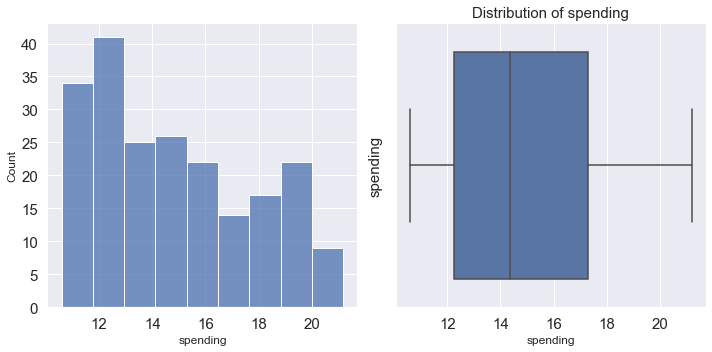

In [10]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='spending',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'spending',data=df,ax=axs[1])
axs[1].set_ylabel('spending',fontsize = 15)
axs[1].set_title('Distribution of spending',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [11]:
# Checking Outliers in the spending data

q1 = np.quantile(df['spending'],0.25)
q3 = np.quantile(df['spending'],0.75)
iqr = q3-q1 # Inter Quantile range

In [12]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in spending: ', l_outliers)
print('Upper outliers in spending: ', u_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [13]:
print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0


#### Observation

**1.** Spending data is rightly skewed

**2.** No outliers in the dataset

### advance_payments

In [14]:
df.advance_payments.describe()

count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64

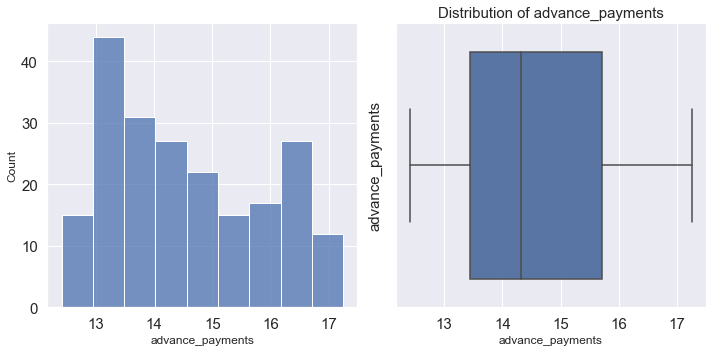

In [15]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='advance_payments',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'advance_payments',data=df,ax=axs[1])
axs[1].set_ylabel('advance_payments',fontsize = 15)
axs[1].set_title('Distribution of advance_payments',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [16]:
# Checking Outliers in the advance_payments data

q1 = np.quantile(df['advance_payments'],0.25)
q3 = np.quantile(df['advance_payments'],0.75)
iqr = q3-q1 # Inter Quantile range

In [17]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in advance_payments: ', l_outliers)
print('Upper outliers in advance_payments: ', u_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [18]:
print('Number of outliers in advance_payments upper : ', df[df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', df[df['advance_payments']<10.052499]['advance_payments'].count())

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0


#### Observation

**1.** Spending data is slightly rightly skewed

**2.** No outliers in the dataset

### probability_of_full_payment

In [19]:
df.probability_of_full_payment.describe()

count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64

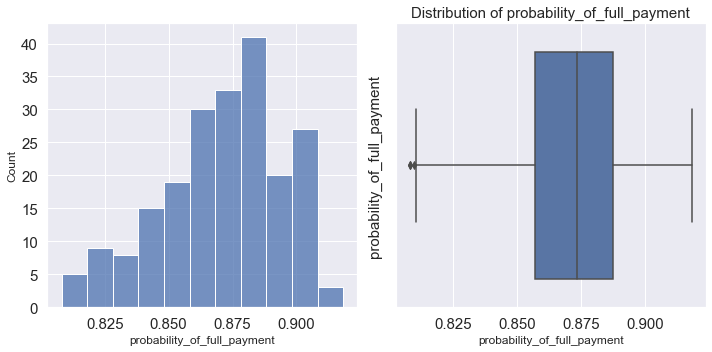

In [20]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='probability_of_full_payment',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'probability_of_full_payment',data=df,ax=axs[1])
axs[1].set_ylabel('probability_of_full_payment',fontsize = 15)
axs[1].set_title('Distribution of probability_of_full_payment',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [21]:
# Checking Outliers in the probability_of_full_payment data

q1 = np.quantile(df['probability_of_full_payment'],0.25)
q3 = np.quantile(df['probability_of_full_payment'],0.75)
iqr = q3-q1 # Inter Quantile range

In [22]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in probability_of_full_payment: ', l_outliers)
print('Upper outliers in probability_of_full_payment: ', u_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [23]:
print('Number of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']> 0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']< 0.8105875]['probability_of_full_payment'].count())

print('% of Outlier in probability_of_full_payment upper: ',round(df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(df)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(df)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payment lower:  1 %


#### Observation

**1.** Spending data is slightly left skewed

**2.** Their is 1% outliers in the dataset

### current_balance 

In [24]:
df.current_balance.describe()

count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64

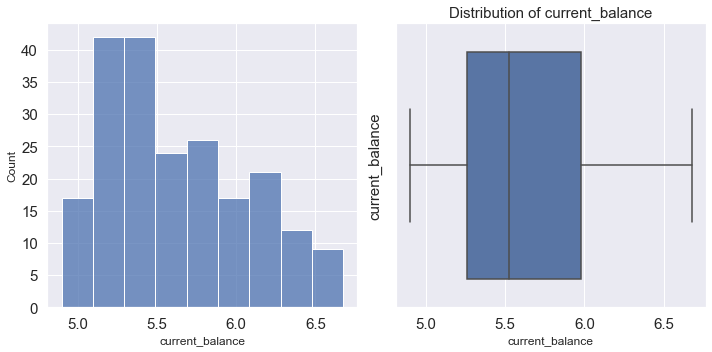

In [25]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='current_balance',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'current_balance',data=df,ax=axs[1])
axs[1].set_ylabel('current_balance',fontsize = 15)
axs[1].set_title('Distribution of current_balance',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [26]:
# Checking Outliers in the current_balance data

q1 = np.quantile(df['current_balance'],0.25)
q3 = np.quantile(df['current_balance'],0.75)
iqr = q3-q1 # Inter Quantile range

In [27]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in current_balance: ', l_outliers)
print('Upper outliers in current_balance: ', u_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [28]:
print('Number of outliers in current_balance upper : ', df[df['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ', df[df['current_balance']<4.186]['current_balance'].count())

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0


#### Observation

**1.** Spending data is slightly rightly skewed

**2.** No outliers in the dataset

### credit_limit  

In [29]:
df.credit_limit.describe()

count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64

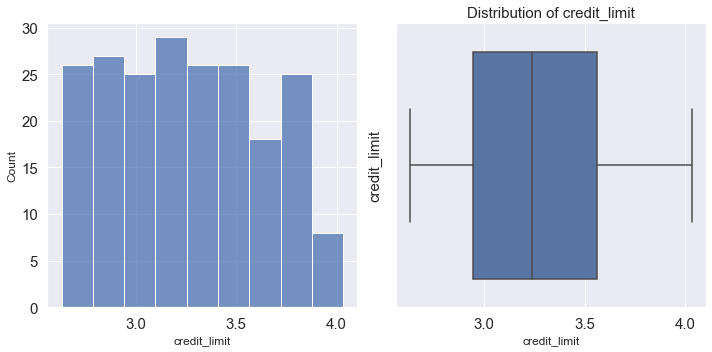

In [30]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='credit_limit',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'credit_limit',data=df,ax=axs[1])
axs[1].set_ylabel('credit_limit',fontsize = 15)
axs[1].set_title('Distribution of credit_limit',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [31]:
# Checking Outliers in the credit_limit data

q1 = np.quantile(df['credit_limit'],0.25)
q3 = np.quantile(df['credit_limit'],0.75)
iqr = q3-q1 # Inter Quantile range

In [32]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in credit_limit: ', l_outliers)
print('Upper outliers in credit_limit: ', u_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [33]:
print('Number of outliers in credit_limit upper : ', df[df['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', df[df['credit_limit']<2.017375]['credit_limit'].count())

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0


#### Observation

**1.** No outliers in the dataset

### min_payment_amt   

In [34]:
df.min_payment_amt .describe()

count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64

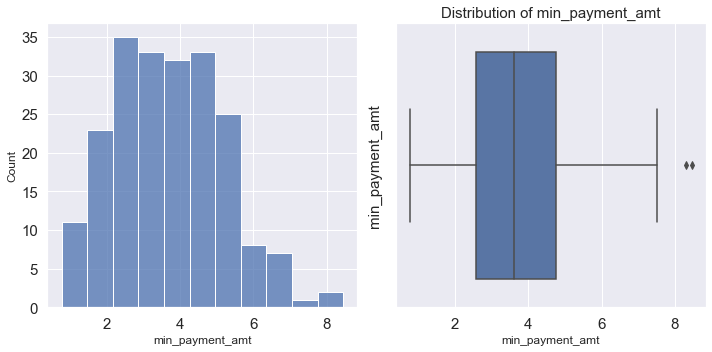

In [35]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='min_payment_amt',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'min_payment_amt',data=df,ax=axs[1])
axs[1].set_ylabel('min_payment_amt',fontsize = 15)
axs[1].set_title('Distribution of min_payment_amt',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [36]:
# Checking Outliers in the min_payment_amt data

q1 = np.quantile(df['min_payment_amt'],0.25)
q3 = np.quantile(df['min_payment_amt'],0.75)
iqr = q3-q1 # Inter Quantile range

In [37]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in min_payment_amt: ', l_outliers)
print('Upper outliers in min_payment_amt: ', u_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [38]:
print('Number of outliers in min_payment_amt upper : ', df[df['min_payment_amt']> 8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', df[df['min_payment_amt']< -0.7493749999999992]['min_payment_amt'].count())

print('% of Outlier in min_payment_amt upper: ',round(df[df['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(df)), '%')
print('% of Outlier in min_payment_amt lower: ',round(df[df['min_payment_amt']<-0.7493749999999992]['min_payment_amt'].count()*100/len(df)), '%')

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper:  1 %
% of Outlier in min_payment_amt lower:  0 %


#### Observation

**1.** Spending data is slightly right skewed

**2.** Their is 1% outliers in the dataset

### max_spent_in_single_shopping    

In [39]:
df.max_spent_in_single_shopping .describe()

count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64

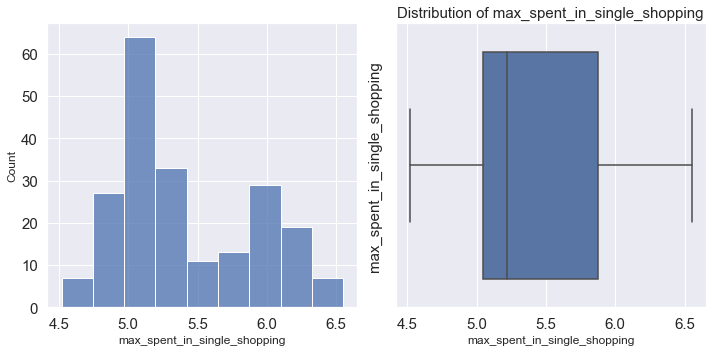

In [40]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# histogram

sns.histplot(x='max_spent_in_single_shopping',data=df,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'max_spent_in_single_shopping',data=df,ax=axs[1])
axs[1].set_ylabel('max_spent_in_single_shopping',fontsize = 15)
axs[1].set_title('Distribution of max_spent_in_single_shopping',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [41]:
# Checking Outliers in the max_spent_in_single_shopping data

q1 = np.quantile(df['max_spent_in_single_shopping'],0.25)
q3 = np.quantile(df['max_spent_in_single_shopping'],0.75)
iqr = q3-q1 # Inter Quantile range

In [42]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in max_spent_in_single_shopping: ', l_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', u_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [43]:
print('Number of outliers in max_spent_in_single_shopping upper : ', df[df['max_spent_in_single_shopping']>7.125]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', df[df['max_spent_in_single_shopping']<3.797]['max_spent_in_single_shopping'].count())

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0


#### Observation

**1.** Spending data is slightly rightly skewed

**2.** No outliers in the dataset

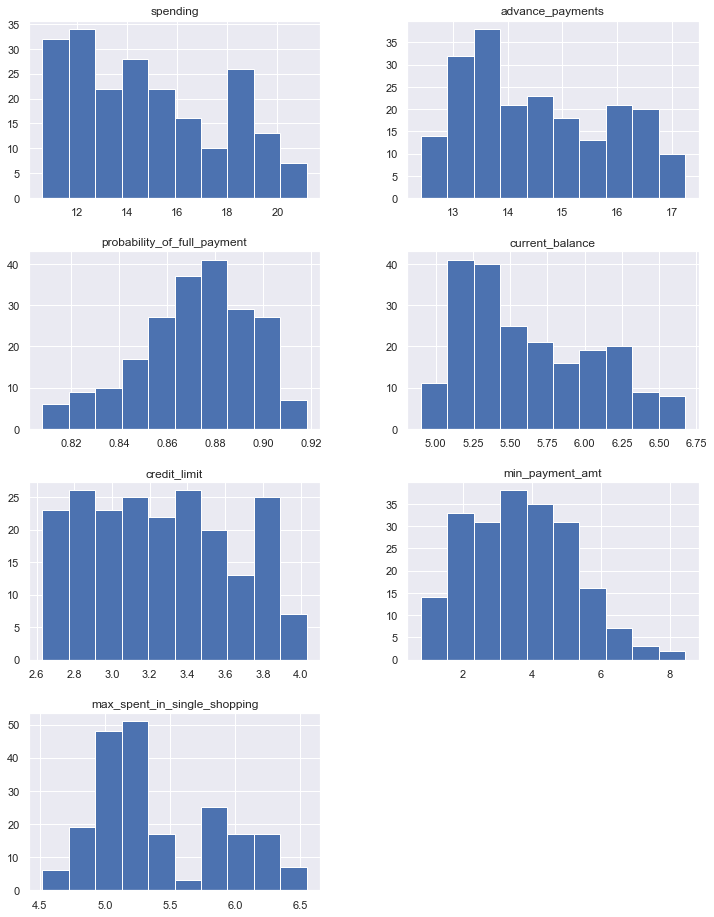

In [44]:
# Histogram of full data

df.hist(figsize = (12,16), layout=(4,2));

<AxesSubplot:>

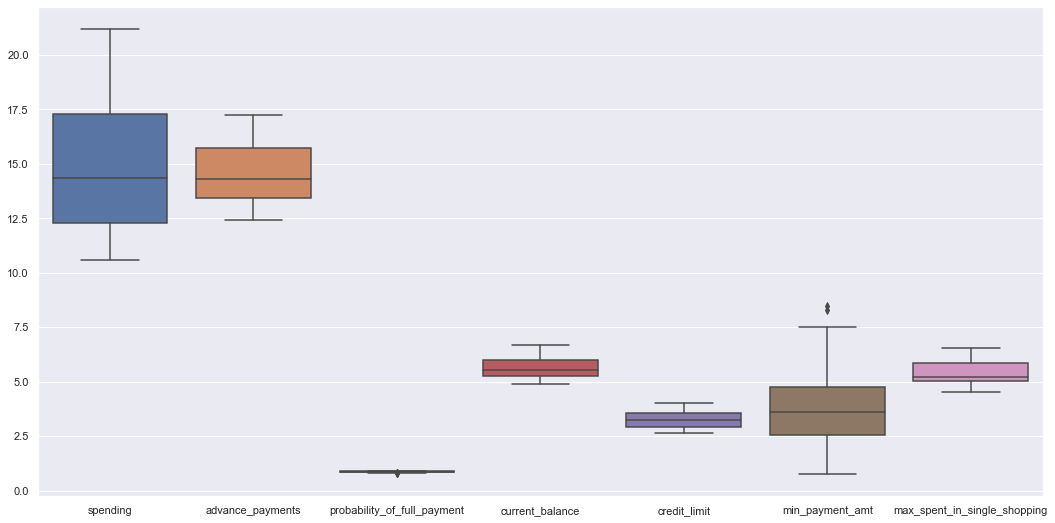

In [45]:
# Boxplot of full data

fig = plt.subplots(figsize=(18,9))
sns.boxplot(data = df)

In [46]:
# Lets check the skwness of the data

df.skew().sort_values(ascending = False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

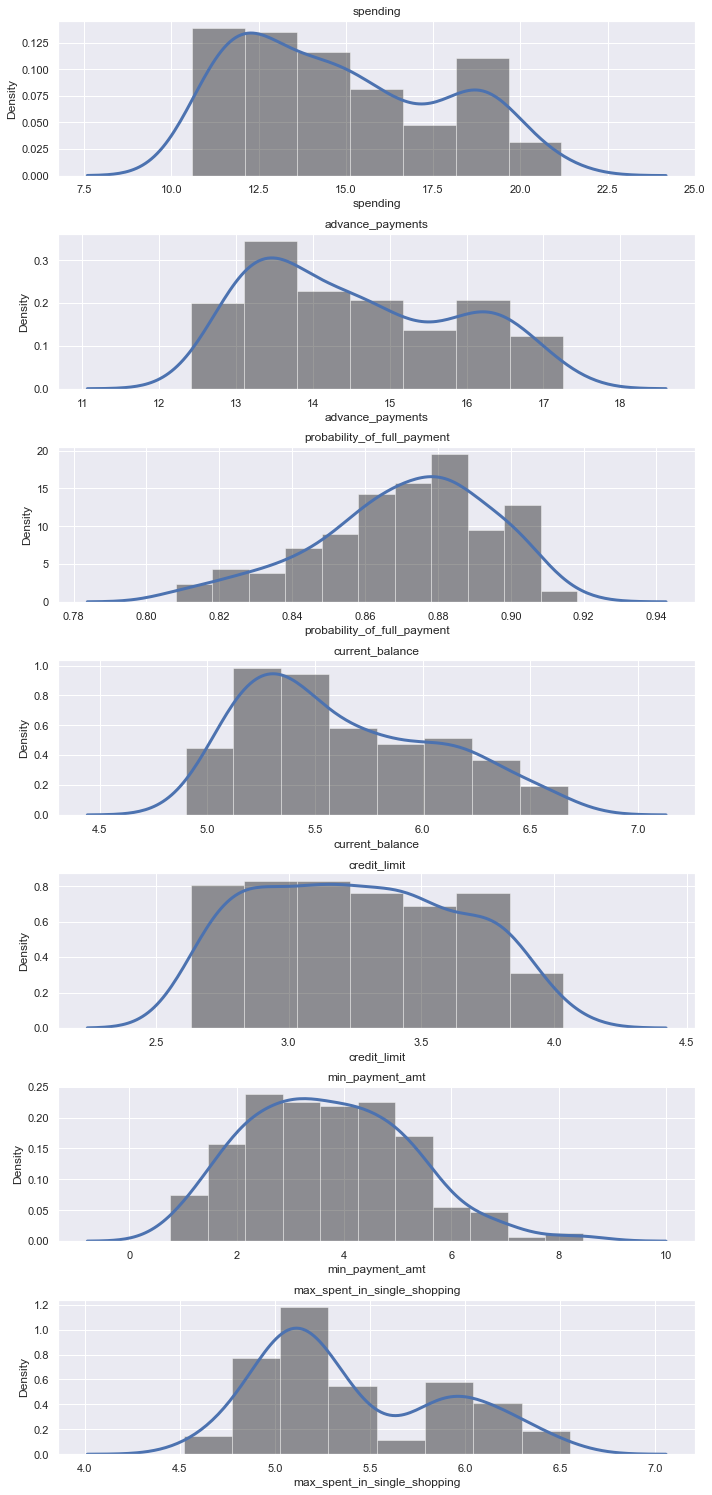

In [47]:
# Distribution plot of full data 

plt.figure(figsize = (10,50))

for i in range(len(df.columns)):
    plt.subplot(17,1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "black"})
    plt.title(df.columns[i])

plt.tight_layout()

#### Observation

**1.**  Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

**2.**  probability_of_full_payment is negatively skewed

**3.** min_payment_amt & probability_of_full_payment have 1% outliers

### Multi-Variate Analysis


#### Checking for Multicollinearity

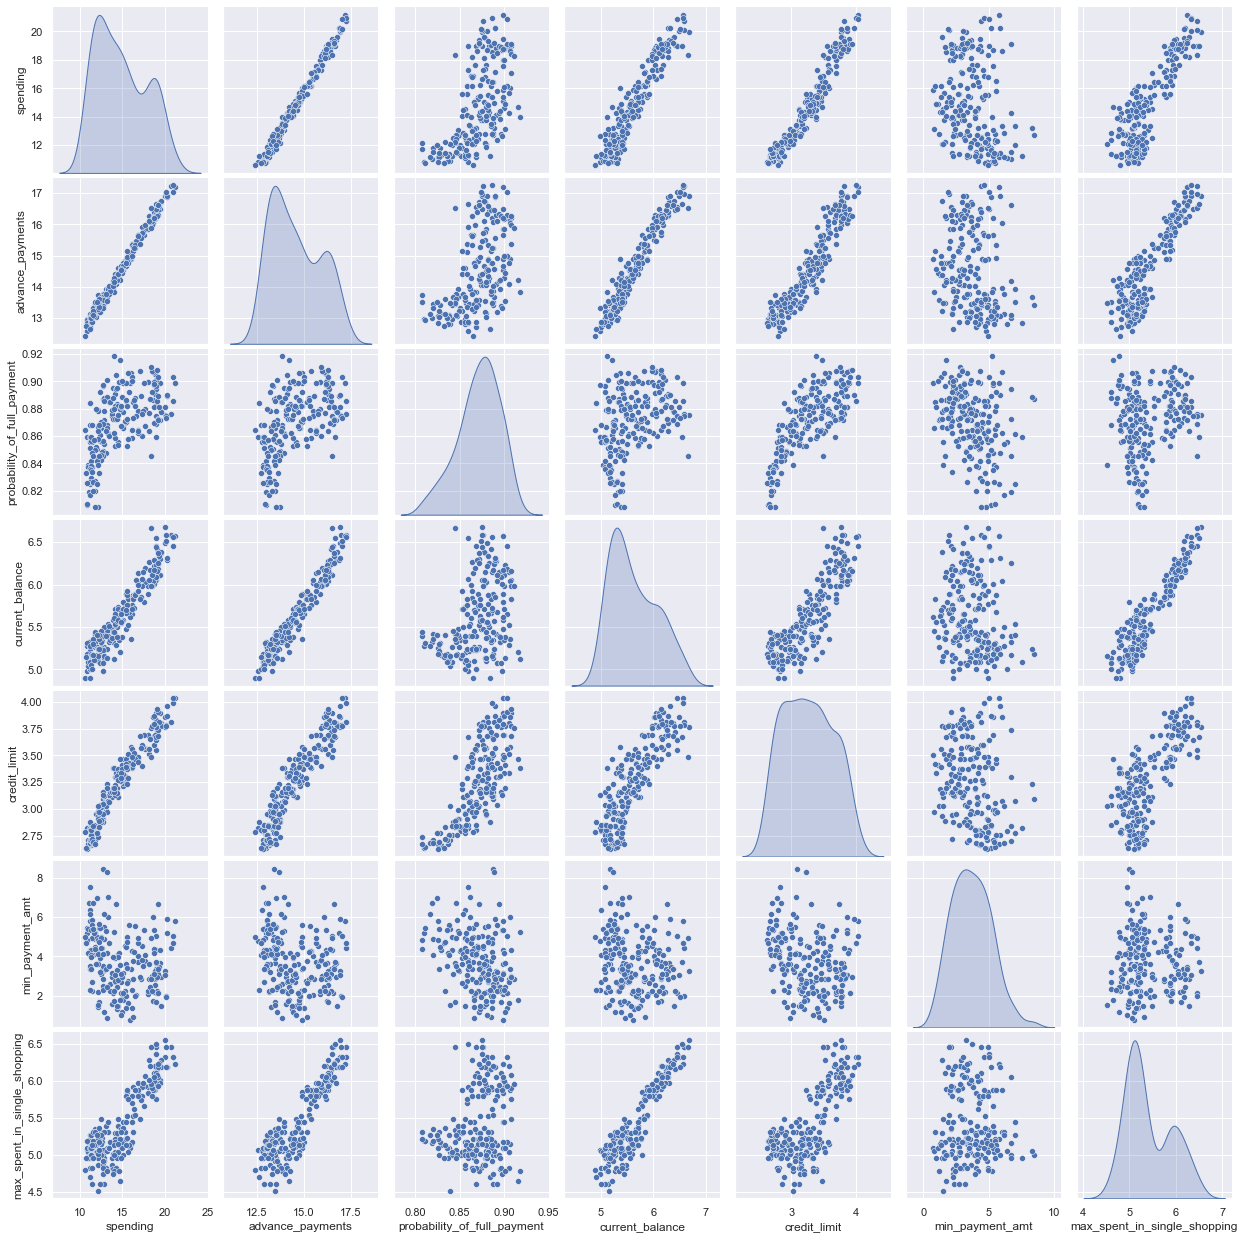

In [48]:
sns.pairplot(df,diag_kind = 'kde');

In [49]:
# Creating Correlation Matrix

corr= df.corr().T
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

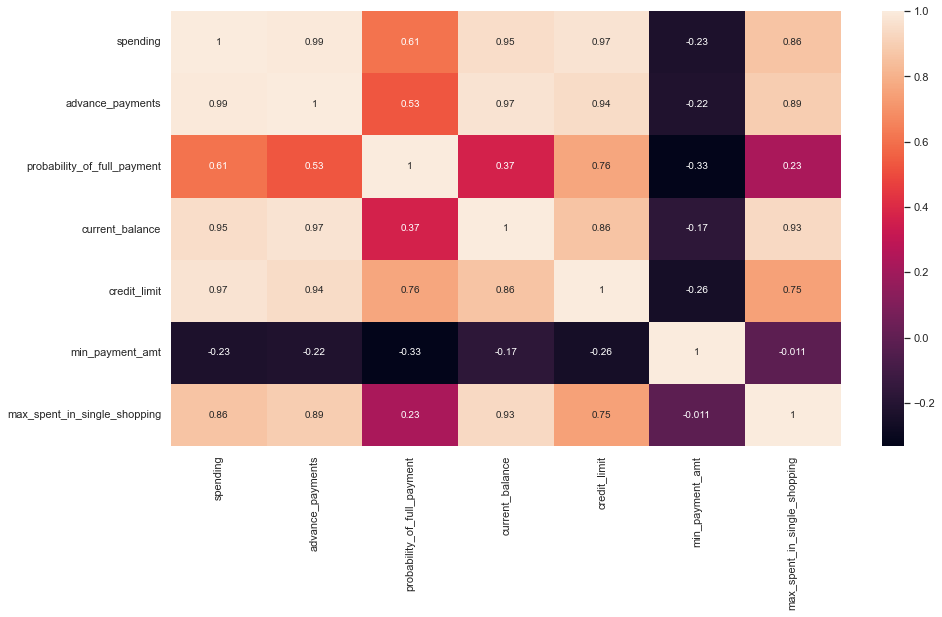

In [50]:
plt.subplots(figsize = (15,8))

sns.heatmap (corr,annot = True)

#### Observation

**1.** Strong positive correlation between: 

        - spending & advance_payments, 
        
        - advance_payments & current_balance, 
        
        - credit_limit & spending
        
        - spending & current_balance
        
        - credit_limit & advance_payments
        
        - max_spent_in_single_shopping & current_balance
        

**2.** min_payment_amt is the weakest correlation 

## Bi - Variate Analysis

#### Lets check the Strong Positive Correlations

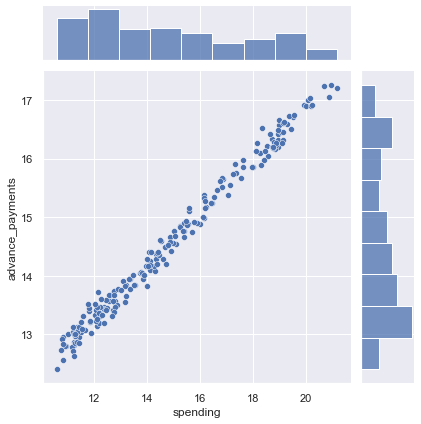

In [51]:
# spending & advance_payments

sns.jointplot(x = 'spending', y = 'advance_payments', data = df)

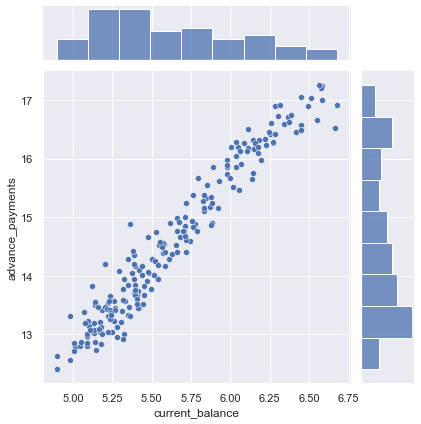

In [52]:
# advance_payments & current_balance, 

sns.jointplot(x = 'current_balance', y = 'advance_payments', data = df)

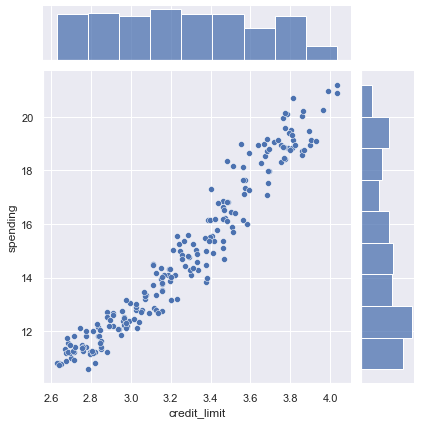

In [53]:
# credit_limit & spending


sns.jointplot(x = 'credit_limit', y = 'spending', data = df)

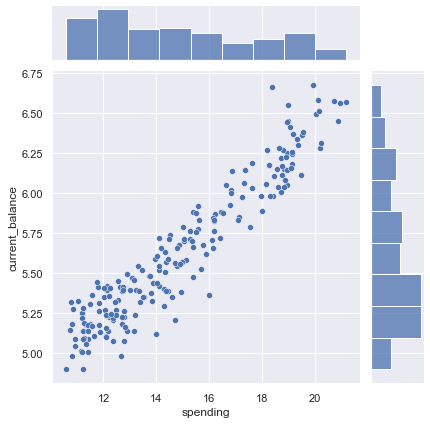

In [54]:
# spending & current_balance

sns.jointplot(x = 'spending', y = 'current_balance', data = df)

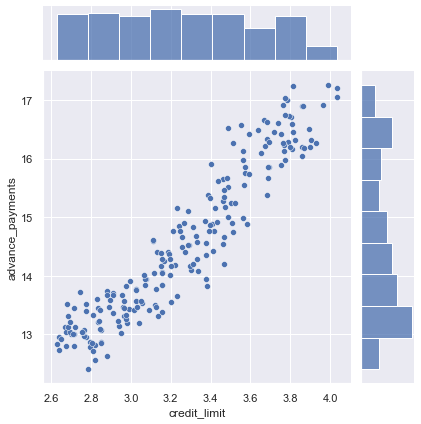

In [55]:
# credit_limit & advance_payments

sns.jointplot(x = 'credit_limit', y = 'advance_payments', data = df)

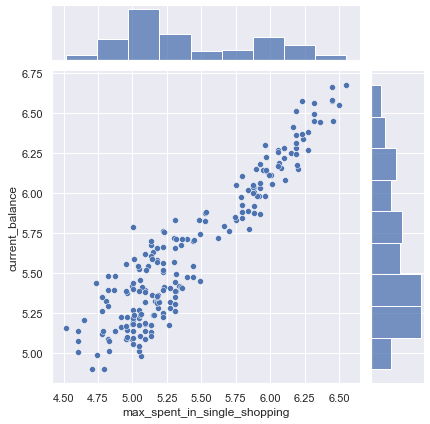

In [56]:
# max_spent_in_single_shopping & current_balance

sns.jointplot(x = 'max_spent_in_single_shopping', y = 'current_balance', data = df)

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes,I think that Scaling is necessary for clustering in this case as standardising the data prevents variables with larger scales from dominating the clustering process.

As we can see from the data spending, advance_payments are in different values and this may get more weightage.

Scaling will help keep the values in relatively same range.

Lets see how the data look before and after scaling in from of a plot graph.


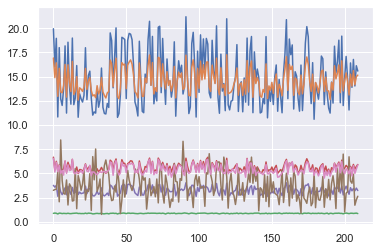

In [57]:
# Graphical Data before Scaling

plt.plot(df)
plt.show()

In [58]:
# Scaling of data

from sklearn.preprocessing import StandardScaler


In [59]:
scaling = StandardScaler().fit_transform(df)
scaling

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [60]:
df_scaled = pd.DataFrame(scaling,columns=df.columns)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


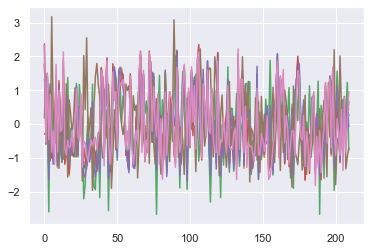

In [61]:
# Graphical Data after Scaling

plt.plot(df_scaled)
plt.show()

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [62]:
# Hierarchical Agglomerative Clustering

from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [63]:
# Using ward as distance measurement

z = linkage(df_scaled,method = 'ward')
z

array([[1.90000000e+01, 2.30000000e+01, 1.93504972e-01, 2.00000000e+00],
       [7.00000000e+00, 3.00000000e+01, 2.10838343e-01, 2.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 2.12567098e-01, 2.00000000e+00],
       [9.50000000e+01, 1.26000000e+02, 2.19082597e-01, 2.00000000e+00],
       [7.00000000e+01, 1.16000000e+02, 2.39904413e-01, 2.00000000e+00],
       [1.48000000e+02, 2.07000000e+02, 2.58887422e-01, 2.00000000e+00],
       [1.27000000e+02, 1.57000000e+02, 2.71067313e-01, 2.00000000e+00],
       [7.60000000e+01, 1.31000000e+02, 2.86861619e-01, 2.00000000e+00],
       [6.70000000e+01, 1.72000000e+02, 2.90557562e-01, 2.00000000e+00],
       [4.00000000e+00, 2.20000000e+01, 2.91245011e-01, 2.00000000e+00],
       [7.10000000e+01, 1.51000000e+02, 2.96325619e-01, 2.00000000e+00],
       [1.85000000e+02, 2.06000000e+02, 3.18522663e-01, 2.00000000e+00],
       [9.90000000e+01, 1.59000000e+02, 3.34441266e-01, 2.00000000e+00],
       [9.00000000e+00, 1.37000000e+02, 3.36662931e

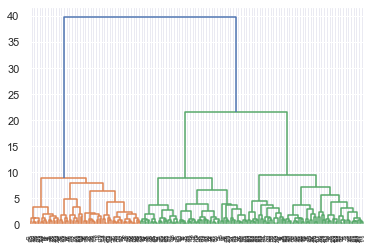

In [64]:
dend = dendrogram(z)

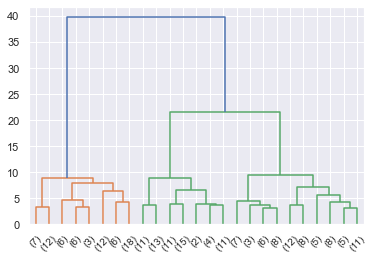

In [65]:
dend_25 = dendrogram(z,
                 truncate_mode = 'lastp',
                 p = 25 )

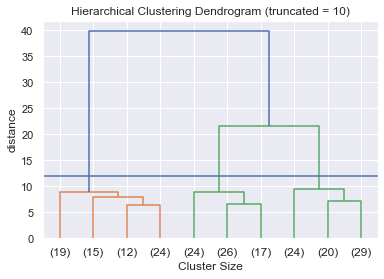

In [66]:
dend_10 = dendrogram(z,
                 truncate_mode = 'lastp',
                 p = 10 )
plt.title('Hierarchical Clustering Dendrogram (truncated = 10)')
plt.xlabel('Cluster Size')
plt.ylabel('distance')
plt.axhline(12)

In [67]:
# Creating clusters
clusters_3 = fcluster(z,3,criterion = 'maxclust')


In [68]:
# Profiling of Clusters - Observing/Comparing the centroids of the cluster
df_copy1 = df.copy()

In [69]:
df_copy1['clusters'] = clusters_3
df_copy1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [70]:
df_clust = df_copy1.groupby('clusters').mean()
df_clust = df_clust.reset_index()
df_clust

,clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
1,2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
2,3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


In [71]:
# Cluster Frequency

freq = df_copy1['clusters'].value_counts().sort_index()
df_clust['frequency'] = freq.values
df_clust

,clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
0,1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
1,2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
2,3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


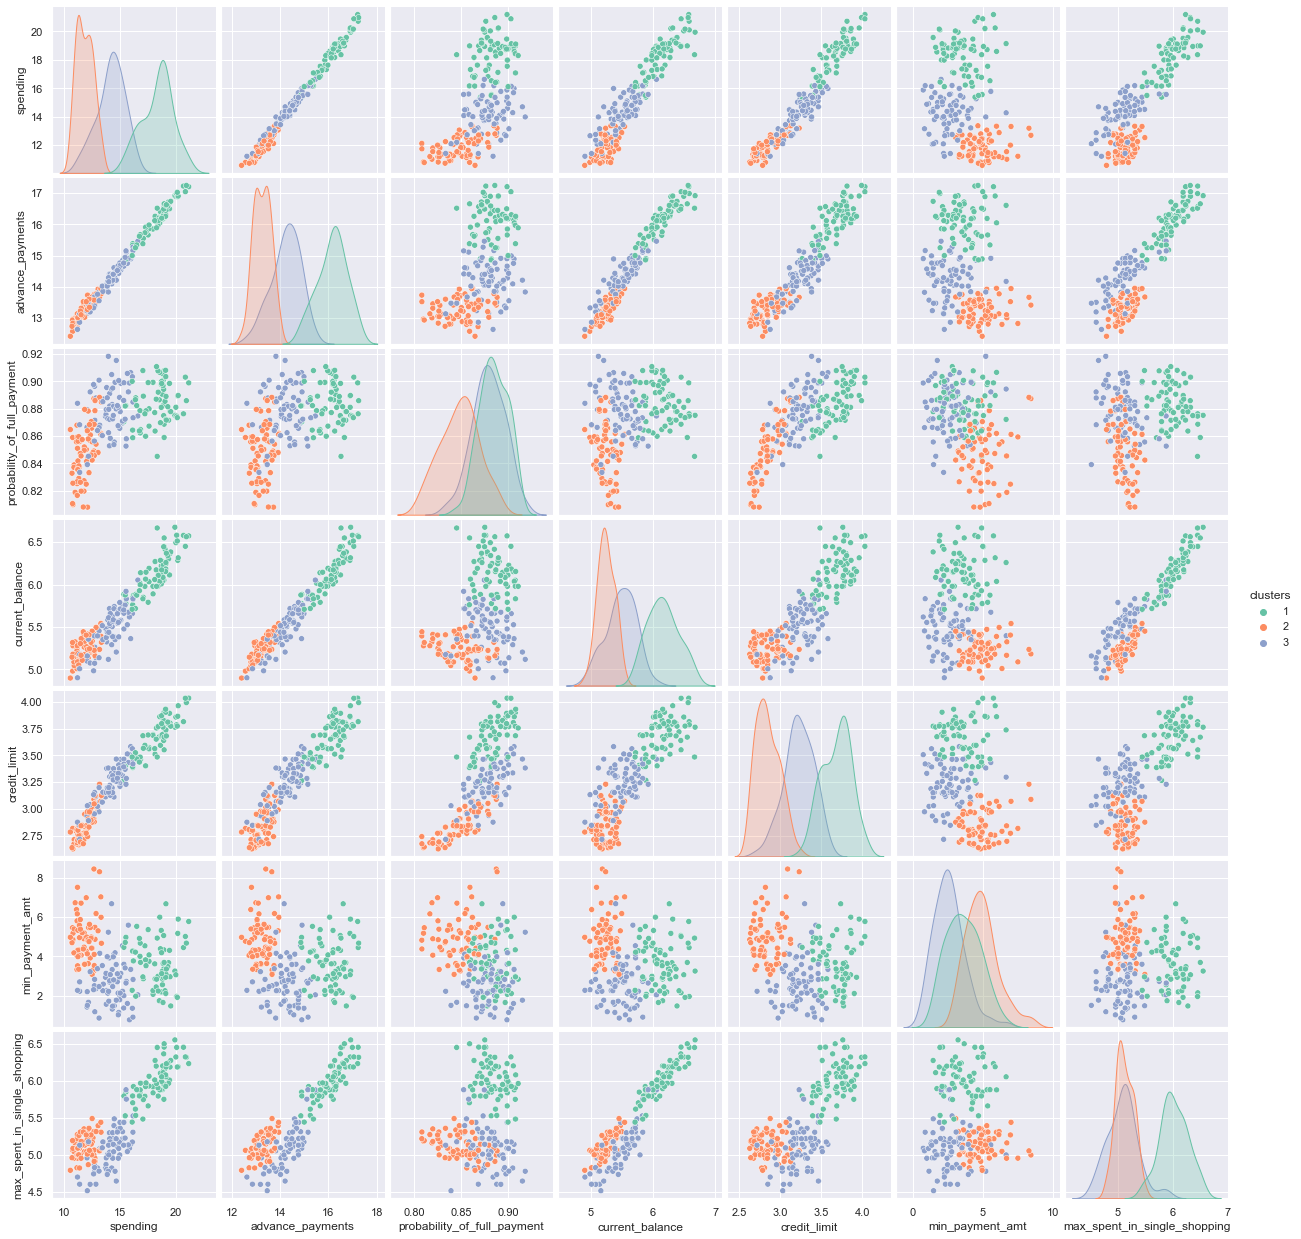

In [72]:
sns.pairplot(df_copy1,hue = 'clusters',diag_kind = 'kde',palette = 'Set2')
plt.show()

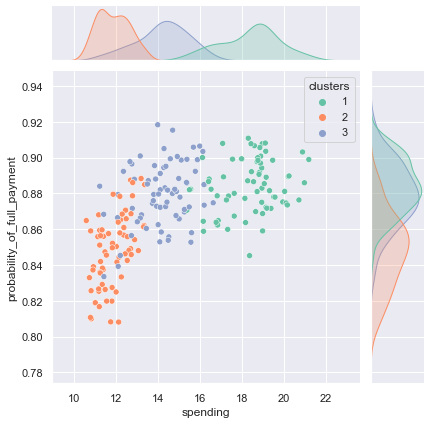

In [73]:
# Closer look into the data

sns.jointplot(x ='spending', y = 'probability_of_full_payment', hue = 'clusters',palette = 'Set2',data = df_copy1)
plt.show() 

#### Observation 

**1.** Based on current dataset given, 3 cluster solution makes sense based on the spending pattern
 - High = Cluster 1
 - Medium = Cluster 2
 - Low = Cluster 3
 
**2.** As we can observe from the 3 cluster segmentations, the customers under the high spenders cluster have higher valuations and probabilities across the various criteria mentioned except the min_payment_amt where the customers of the low spenders cluster have a higher bill value amount as their minimum amount that would have to be remitted.

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [74]:
from sklearn.cluster import KMeans

In [75]:
wss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters = i,random_state = 1)
    kmeans.fit(df_scaled)
    wss.append(kmeans.inertia_)


In [76]:
for i in range(1,11):
    print('The WSS value for',i,'clusters is',wss[i-1])

The WSS value for 1 clusters is 1470.0000000000002
The WSS value for 2 clusters is 659.1717544870406
The WSS value for 3 clusters is 430.6589731513006
The WSS value for 4 clusters is 371.30172127754213
The WSS value for 5 clusters is 327.96082400790317
The WSS value for 6 clusters is 290.590030596822
The WSS value for 7 clusters is 264.8315308747815
The WSS value for 8 clusters is 240.68372595015978
The WSS value for 9 clusters is 220.85285825594738
The WSS value for 10 clusters is 206.38291036015787


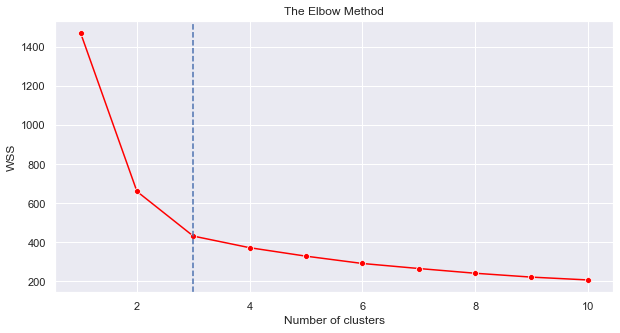

In [77]:
plt.figure(figsize =(10,5))
sns.lineplot(range(1,11),wss,marker = 'o',color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.axvline(3,linestyle = 'dashed')
plt.show()


#### Observation

We go with 3 cluster segmentation as per our business recommendation as we see an elbow at cluster number = 3 after which the scree plot seems redundant.

In [78]:
kmeans2 = KMeans(n_clusters = 3,random_state = 1)
clust_3 = kmeans2.fit_predict(df_scaled)
clust_3

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [79]:
kmeans2.inertia_

430.6589731513006

In [80]:
df_copy2 = df.copy()

In [81]:
df_copy2['Kmeans_Clusters'] = clust_3

In [82]:
df_copy2

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,2


In [83]:
df_clust2 = df_copy2.groupby('Kmeans_Clusters').mean()
df_clust2 = df_clust2.reset_index()
df_clust2

,Kmeans_Clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
1,1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803


In [84]:
freq2 = df_copy2['Kmeans_Clusters'].value_counts().sort_index()
df_clust2['k_frequency'] = freq.values
df_clust2

,Kmeans_Clusters,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_frequency
0,0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,70
1,1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,73


In [85]:
# Silhouette Score

from sklearn.metrics import silhouette_samples,silhouette_score

In [86]:
silhouette_samples(df_scaled,df_copy2['Kmeans_Clusters'])

array([0.57369874, 0.36638639, 0.63778363, 0.51245819, 0.36227633,
       0.21844638, 0.4728666 , 0.36181217, 0.52028453, 0.5325168 ,
       0.46759191, 0.13224116, 0.38966769, 0.5247812 , 0.11221528,
       0.22129574, 0.33795723, 0.49990157, 0.03155344, 0.2357566 ,
       0.35903729, 0.36612754, 0.43277307, 0.26136159, 0.47570507,
       0.06575223, 0.2717924 , 0.50389413, 0.55352814, 0.43430599,
       0.37707319, 0.42823997, 0.38827268, 0.39498208, 0.5345933 ,
       0.55628078, 0.50760384, 0.42334973, 0.50496507, 0.62241469,
       0.56053376, 0.48652307, 0.39923175, 0.61098901, 0.51352958,
       0.37606912, 0.30715373, 0.58258949, 0.48825724, 0.53403992,
       0.31448221, 0.49548458, 0.58601272, 0.59926567, 0.61967102,
       0.23378798, 0.44189877, 0.5384123 , 0.57674252, 0.57696905,
       0.55410258, 0.51383032, 0.55412974, 0.28131787, 0.49622138,
       0.56495699, 0.57828489, 0.5237842 , 0.63205238, 0.08288516,
       0.44353914, 0.32042362, 0.54187254, 0.58284321, 0.29226

In [87]:
silhouette_score(df_scaled,df_copy2['Kmeans_Clusters'])

0.40072705527512986

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Group 1: High Spending Group 

• Offerings like higher reward points with a higher likelihood can boost their spending power.

• Including a free EMI option as part of a campaign with a bank's affiliated brands might be a terrific motivation for this demographic.

• The segmentation of this group's maximum max spent in single shopping is the highest, which explains the discounts or alluring offers made on subsequent transactions with full upfront payments.

• Regular evaluation and raising of credit limits

• Preferential customer treatment, which can encourage more extravagant spending

• Because it is obvious that the clients in this category are financially sound, it may be possible to develop appealing loan programmes just for them.

• The one-time maximum spending would increase as a result of collaborations with high end luxury goods and accessories.

Group 2 : Medium Spending Group 

• Due to regular maintenance of a higher credit score and subsequent timely bill payment, it is proposed that the consumers in this segmentation cluster are the target customers with the highest potential.

• Keeping RBI requirements in mind, customers in this group might have their credit limits expanded, reviewed on a regular basis, and their interest rates significantly marginalised.

• The long-term growth in transactional values would result from the advertising and promotion of premium cards or loyalty cards of specific brand collaboration alliances.

• Once the aforementioned credit limits are raised, premium partners in e-commerce, travel portals, airlines, and hotels will automatically see an increase in spending patterns.



Group 3: Low Spending Group 

• We can analyse which products and services this market segment spends the most money on and give discounts and offers on credit card usage in accordance.

• In order to prevent missed billing cycle due dates, customers in this category must receive prompt payment reminders.

• Small-scale campaigns might be undertaken to provide this segment's clients enticing incentives for making payments early. This would increase the rate of payments received and lower the default rates.


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART & RF and compare the models' performances in train and test sets.

**Attribute Information:**

1. Target: Claim Status (Claimed)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration in days)

7. Destination of the tour (Destination)

8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)

9. The commission received for tour insurance firm (Commission is in percentage of sales)

10. Age of insured (Age)


## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### Loading data

In [88]:
df2 = pd.read_csv('insurance_part2_data.csv')

#### Checking of data

In [89]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [90]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Unique counts of all Nominal Variables

In [92]:
print('Agency Code:')
print(df2.Agency_Code.value_counts())

Agency Code:
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


In [93]:
print('Type:')
print(df2.Type.value_counts())

Type:
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


In [94]:
print('Channel:')
print(df2.Channel.value_counts())

Channel:
Online     2954
Offline      46
Name: Channel, dtype: int64


In [95]:
print('Product Name:')
print(df2['Product Name'].value_counts())

Product Name:
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


In [96]:
print('Destination:')
print(df2['Destination'].value_counts())

Destination:
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


In [97]:
print('Claimed:')
print(df2['Claimed'].value_counts())

Claimed:
No     2076
Yes     924
Name: Claimed, dtype: int64


#### Observation

- 10 variables = 9 independant variable and one target variable - **Clamied**
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 2 Type of tour insurance firms: 'Airlines', 'Travel Agency'
- Distribution channel: 'Online', 'Offline'
- Names of tour insurance product : Customised Plan', 'Cancellation Plan',   'Bronze Plan','Silver Plan', 'Gold Plan'
- Destination: 'ASIA', 'Americas', 'EUROPE

#### Check Missing values

In [98]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

#### Observation

No Null Values

#### Descriptive Statistics Summary

In [99]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [100]:
df2.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df2.shape

(3000, 10)

In [102]:
df2.duplicated().sum() # not removing the duplicates

139

## Univariate Analysis



### Age Variable

In [103]:
df2.Age.describe()

count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64

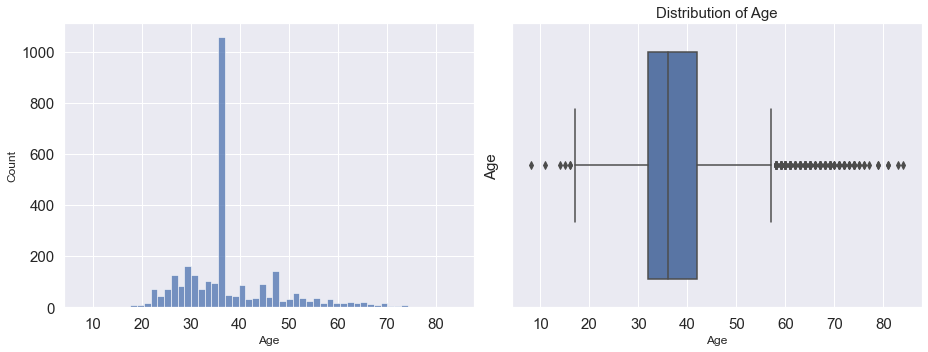

In [104]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# histogram

sns.histplot(x='Age',data=df2,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'Age',data=df2,ax=axs[1])
axs[1].set_ylabel('Age',fontsize = 15)
axs[1].set_title('Distribution of Age',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [105]:
# Checking Outliers in the spending data

q1 = np.quantile(df2['Age'],0.25)
q3 = np.quantile(df2['Age'],0.75)
iqr = q3-q1 # Inter Quantile range

In [106]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in Age: ', l_outliers)
print('Upper outliers in Age: ', u_outliers)

Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [107]:
print('Number of outliers in Age upper : ', df2[df2['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', df2[df2['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(df2[df2['Age']>57.0]['Age'].count()*100/len(df2)), '%')
print('% of Outlier in Age lower: ',round(df2[df2['Age']<17.0]['Age'].count()*100/len(df2)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


#### Observation

**1.** Their 7% are outliers in the dataset

## Commision variable

In [108]:
df2.Commision.describe()

count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64

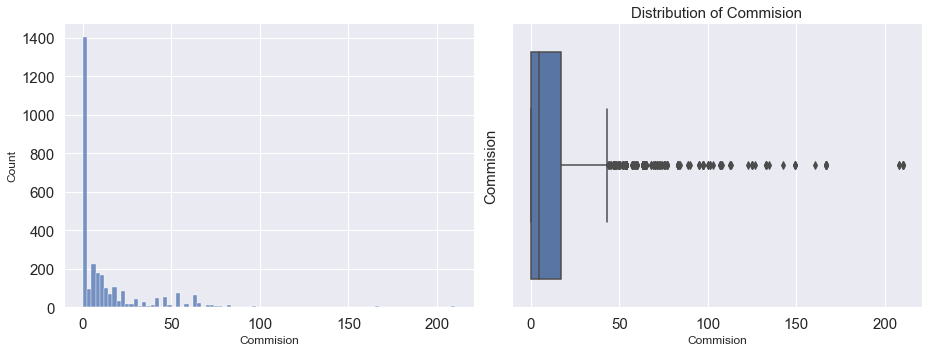

In [109]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# histogram

sns.histplot(x='Commision',data=df2,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'Commision',data=df2,ax=axs[1])
axs[1].set_ylabel('Commision',fontsize = 15)
axs[1].set_title('Distribution of Commision',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [110]:
# Checking Outliers in the spending data

q1 = np.quantile(df2['Commision'],0.25)
q3 = np.quantile(df2['Commision'],0.75)
iqr = q3-q1 # Inter Quantile range

In [111]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in Commision: ', l_outliers)
print('Upper outliers in Commision: ', u_outliers)

Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [112]:
print('Number of outliers in Commision upper : ', df2[df2['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', df2[df2['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(df2[df2['Commision']>43.0875]['Commision'].count()*100/len(df2)), '%')
print('% of Outlier in Commision lower: ',round(df2[df2['Commision']<-25.8525]['Commision'].count()*100/len(df2)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


#### Observation

**1.** Their are 12% outliers in the dataset

## Duration variable

In [113]:
df2.Duration.describe()

count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64

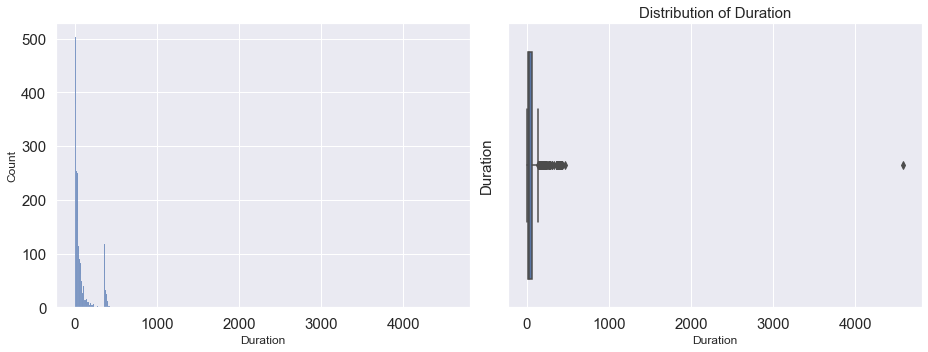

In [114]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# histogram

sns.histplot(x='Duration',data=df2,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'Duration',data=df2,ax=axs[1])
axs[1].set_ylabel('Duration',fontsize = 15)
axs[1].set_title('Distribution of Duration',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [115]:
# Checking Outliers in the spending data

q1 = np.quantile(df2['Duration'],0.25)
q3 = np.quantile(df2['Duration'],0.75)
iqr = q3-q1 # Inter Quantile range

In [116]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in Duration: ', l_outliers)
print('Upper outliers in Duration: ', u_outliers)

Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [117]:
print('Number of outliers in Duration upper : ', df2[df2['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', df2[df2['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(df2[df2['Duration']>141.0]['Duration'].count()*100/len(df2)), '%')
print('% of Outlier in Duration lower: ',round(df2[df2['Duration']<-67.0]['Duration'].count()*100/len(df2)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


#### Observation

**1.** There are 13% outliers in the dataset

## Sales variable

In [118]:
df2.Sales.describe()

count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64

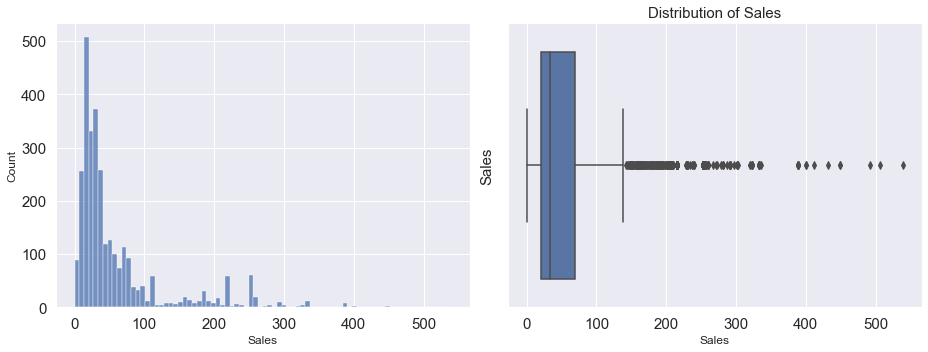

In [119]:
# Ploting of histogram and Boxplot

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# histogram

sns.histplot(x='Sales',data=df2,ax=axs[0])
axs[0].tick_params(labelsize= 15)

# Boxplot
sns.boxplot(x = 'Sales',data=df2,ax=axs[1])
axs[1].set_ylabel('Sales',fontsize = 15)
axs[1].set_title('Distribution of Sales',fontsize = 15)
axs[1].tick_params(labelsize= 15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [120]:
# Checking Outliers in the spending data

q1 = np.quantile(df2['Sales'],0.25)
q3 = np.quantile(df2['Sales'],0.75)
iqr = q3-q1 # Inter Quantile range

In [121]:
l_outliers = q1-1.5*iqr
u_outliers = q3+1.5*iqr
print('Lower outliers in Sales: ', l_outliers)
print('Upper outliers in Sales: ', u_outliers)

Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [122]:
print('Number of outliers in Sales upper : ', df2[df2['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', df2[df2['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(df2[df2['Sales']>142.5]['Sales'].count()*100/len(df2)), '%')
print('% of Outlier in Sales lower: ',round(df2[df2['Sales']<-53.5]['Sales'].count()*100/len(df2)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


#### Observation

**1.** Their are 12% outliers in the dataset

## Categorical Variables¶

### Agency_Code

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

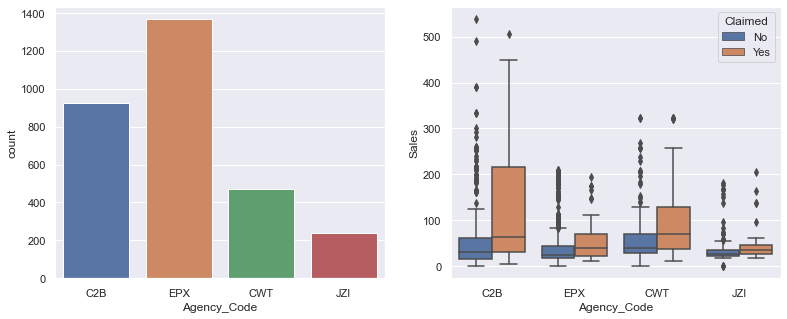

In [123]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Count Plot
sns.countplot(data = df2, x = 'Agency_Code',ax=axs[0])

# Boxplot
sns.boxplot(data = df2, x='Agency_Code',y='Sales', hue='Claimed',ax=axs[1])

### Type

<AxesSubplot:xlabel='Type', ylabel='Sales'>

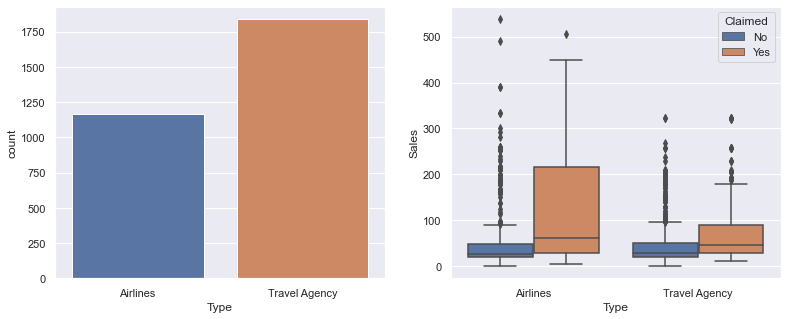

In [124]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Count Plot
sns.countplot(data = df2, x = 'Type',ax=axs[0])

# Boxplot
sns.boxplot(data = df2, x='Type',y='Sales', hue='Claimed',ax=axs[1])

### Channel

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

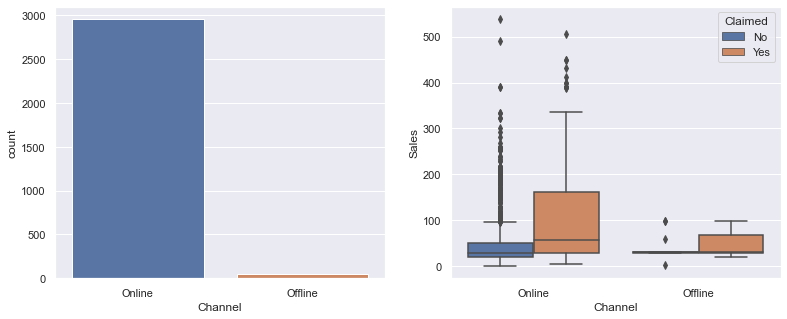

In [125]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Count Plot
sns.countplot(data = df2, x = 'Channel',ax=axs[0])

# Boxplot
sns.boxplot(data = df2, x='Channel',y='Sales', hue='Claimed',ax=axs[1])

### Product Name

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

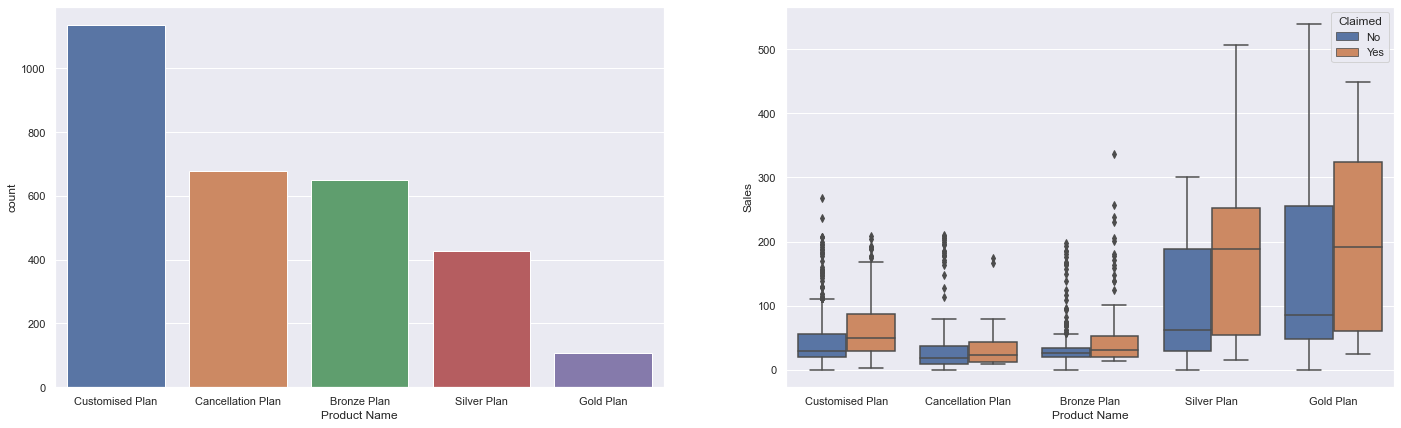

In [126]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(24,7))

# Count Plot
sns.countplot(data = df2, x = 'Product Name',ax=axs[0])

# Boxplot
sns.boxplot(data = df2, x='Product Name',y='Sales', hue='Claimed',ax=axs[1])

### Destination 

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

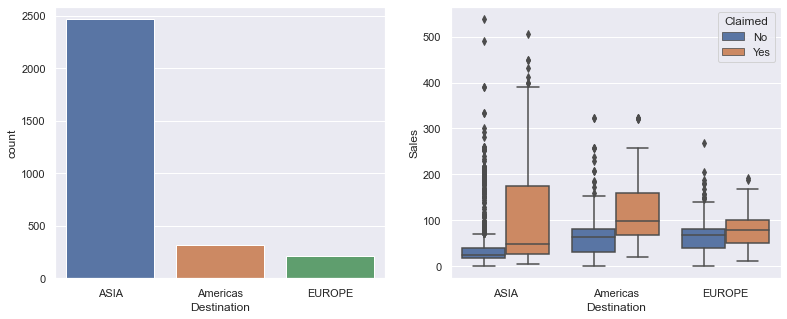

In [127]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Count Plot
sns.countplot(data = df2, x = 'Destination',ax=axs[0])

# Boxplot
sns.boxplot(data = df2, x='Destination',y='Sales', hue='Claimed',ax=axs[1])

### Multi-Variate Analysis


#### Checking for Multicollinearity

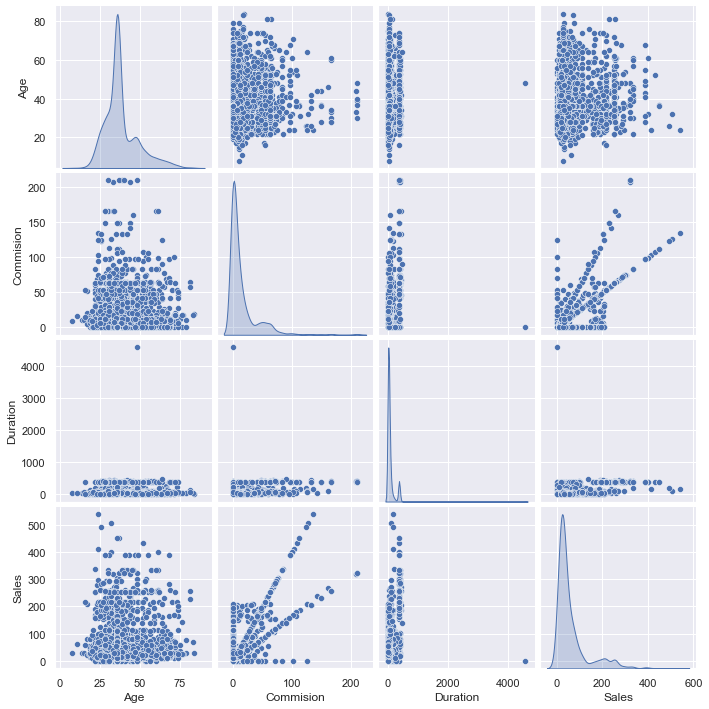

In [128]:
sns.pairplot(df2,diag_kind = 'kde');

In [129]:
# Creating Correlation Matrix

corr= df2.corr().T
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


<AxesSubplot:>

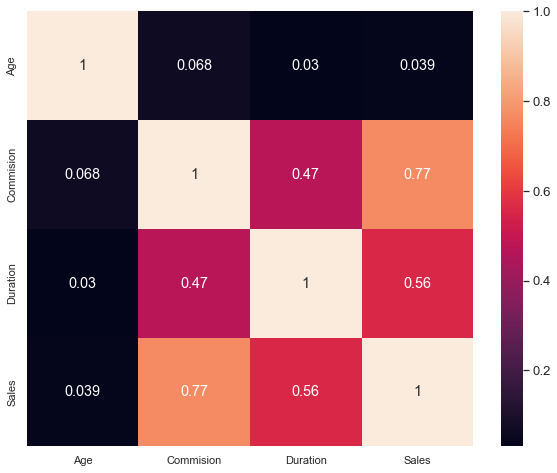

In [130]:
plt.subplots(figsize = (10,8))
sns.set(font_scale=1.2)

sns.heatmap (corr,annot = True)

#### Observation

- Highest Positive correlation can be found only betweeen sales and commission

## Bi - Variate Analysis

#### Lets check the Strong Positive Correlations

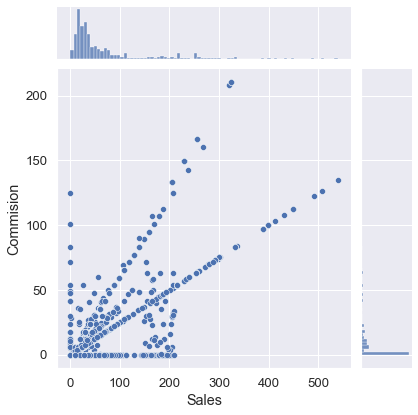

In [131]:
# Sales & Commision

sns.jointplot(x = 'Sales', y = 'Commision', data = df2)

## Converting all objects to categorical codes

In [132]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [134]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Proportion of 1s and 0s in Target Variable

In [135]:
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Creating Training set and Test set

In [137]:
x = df2.drop('Claimed',axis = 1)

y= df2.pop('Claimed')

In [138]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   int8   
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   int8   
 8   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 108.5 KB


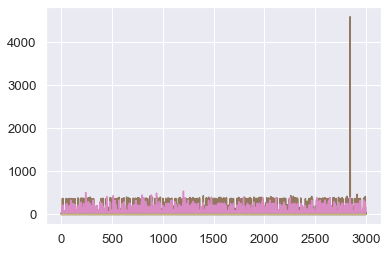

In [139]:
# Graphical Data before scaling
plt.plot(x)
plt.show()

In [140]:
# Scaling of data
from scipy.stats import zscore
x_scaled = x.apply(zscore)
x_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


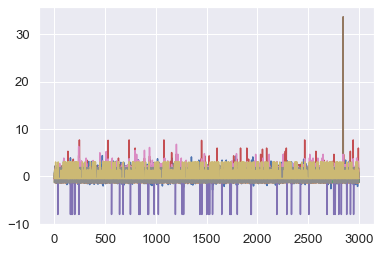

In [141]:
# Graphical Data After scaling
plt.plot(x_scaled)
plt.show()

### Splitinig data into training and test dataset

In [142]:
x_train,x_test,train_labels,test_labels = train_test_split(x_scaled,y,test_size = 0.3, random_state = 1)


In [143]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [144]:
# Building a decision tree
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state= 1)


In [145]:
dt_model.fit(x_train,train_labels)
dt_model.get_depth()

26

In [146]:
dt_model.score(x_train,train_labels)

0.9947619047619047

In [147]:
dt_model.score(x_test,test_labels)

0.7177777777777777

In [148]:
test_predictions = dt_model.predict(x_test)

In [149]:
from sklearn import metrics

metrics.confusion_matrix(test_labels,test_predictions)

array([[498, 107],
       [147, 148]], dtype=int64)

In [150]:
print(metrics.classification_report(test_labels,test_predictions))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       605
           1       0.58      0.50      0.54       295

    accuracy                           0.72       900
   macro avg       0.68      0.66      0.67       900
weighted avg       0.71      0.72      0.71       900



#### Observation

- Model looks overfitted

In [151]:
# Pruning of decision tree
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', random_state= 1,max_depth = 10)

In [152]:
reg_dt_model.fit(x_train,train_labels)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [153]:
reg_dt_model.score(x_train,train_labels)

0.8766666666666667

In [154]:
reg_dt_model.score(x_test,test_labels)

0.76

In [155]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', random_state= 1,min_samples_split = 100, min_samples_leaf = 20)

In [156]:
reg_dt_model.fit(x_train,train_labels)

DecisionTreeClassifier(min_samples_leaf=20, min_samples_split=100,
                       random_state=1)

In [157]:
reg_dt_model.score(x_train,train_labels)

0.8

In [158]:
reg_dt_model.score(x_test,test_labels)

0.7455555555555555

###  Building a Decision Tree Classifiers of different combinations

#### Combination1

In [159]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [160]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [161]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.599363
Sales         0.255785
Product Name  0.056555
Duration      0.037945
Age           0.030261
Commision     0.012676
Type          0.007416
Channel       0.000000
Destination   0.000000


#### Combination 2

In [162]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [163]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [164]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.563106
Sales         0.246431
Product Name  0.071927
Age           0.046258
Duration      0.044121
Commision     0.021191
Type          0.006967
Channel       0.000000
Destination   0.000000


#### Combination 3

In [165]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [166]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5.0, 'min_samples_leaf': 42, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=5.0, min_samples_leaf=42,
                       min_samples_split=200, random_state=1)

In [167]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.604561
Sales         0.254851
Product Name  0.055097
Duration      0.036387
Age           0.026631
Commision     0.022472
Type          0.000000
Channel       0.000000
Destination   0.000000


#### Combination 4

In [168]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [169]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 4.0, 'min_samples_leaf': 46, 'min_samples_split': 280}


DecisionTreeClassifier(max_depth=4.0, min_samples_leaf=46,
                       min_samples_split=280, random_state=1)

In [170]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.621974
Sales         0.257721
Product Name  0.057386
Commision     0.023406
Duration      0.023111
Age           0.016403
Type          0.000000
Channel       0.000000
Destination   0.000000


#### Observation

Combination 4 has the best Variable importance in Decision Tree Classification

In [171]:
# Predicting on Training and Test dataset

ytrain_predict_dtcl = best_grid_dtcl.predict(x_train)
ytest_predict_dtcl = best_grid_dtcl.predict(x_test)

In [172]:
# Getting the Predicted Classes and Probs

ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(x_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.887805,0.112195
1,0.432432,0.567568
2,0.432432,0.567568
3,0.208163,0.791837
4,0.937143,0.062857


### Building a Random Forest Classifier

In [173]:
param_grid_rfcl = {
    'max_depth': [6],
    'max_features': [3],
    'min_samples_leaf': [8],
    'min_samples_split': [46],
    'n_estimators': [350],
    }

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [174]:
grid_search_rfcl.fit(x_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=3, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

In [175]:
# Predicting on Training and Test dataset

ytrain_predict_rfcl = best_grid_rfcl.predict(x_train)
ytest_predict_rfcl = best_grid_rfcl.predict(x_test)

In [176]:
# Getting the Predicted Classes and Probs

ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(x_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.729220,0.270780
1,0.522950,0.477050
2,0.474770,0.525230
3,0.255556,0.744444
4,0.930721,0.069279



X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)

In [177]:
grid_search_rfcl.fit(x_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [6], 'max_features': [3],
                         'min_samples_leaf': [8], 'min_samples_split': [46],
                         'n_estimators': [350]})

In [178]:
grid_search_rfcl.score(x_train,train_labels)

0.8104761904761905

In [179]:
grid_search_rfcl.score(x_test,test_labels)

0.7733333333333333

In [180]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.263989
Product Name  0.219047
Sales         0.161785
Commision     0.143733
Type          0.076743
Duration      0.075790
Age           0.048086
Destination   0.009889
Channel       0.000937


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### CART - AUC and ROC for the training data

AUC: 0.825


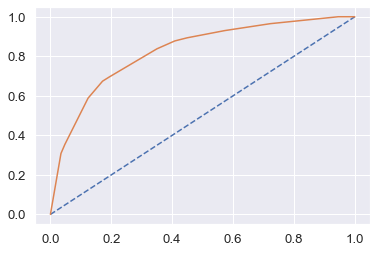

In [181]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### CART -AUC and ROC for the test data

AUC: 0.792


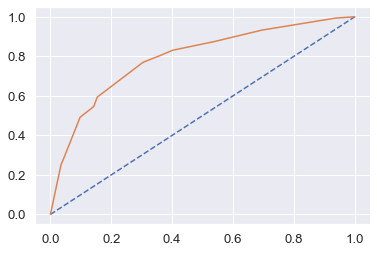

In [182]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### CART Confusion Matrix and Classification Report for the training data¶

In [183]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1289,  182],
       [ 259,  370]], dtype=int64)

In [184]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train,train_labels) 
cart_train_acc

0.79

In [185]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.59      0.63       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.79      2100



In [186]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


### CART Confusion Matrix and Classification Report for the testing data

In [187]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[546,  59],
       [150, 145]], dtype=int64)

In [188]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test,test_labels)
cart_test_acc

0.7677777777777778

In [189]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [190]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.49
cart_test_f1  0.58


### Cart Conclusion


Cart Conclusion
Train Data:
- AUC: 82.5%
- Accuracy: 79%
- Precision: 67%
- f1-Score: 63%

Test Data:
- AUC: 89.2%
- Accuracy: 76.7%
- Precision: 71%
- f1-Score: 58%


#### Observation

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### RF Model Performance Evaluation on Training data

In [191]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1331,  140],
       [ 258,  371]], dtype=int64)

In [192]:
#Train Data Accuracy
rf_train_acc=best_grid_rfcl.score(x_train,train_labels) 
rf_train_acc

0.8104761904761905

In [193]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.73      0.59      0.65       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [194]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)


rf_train_precision  0.73
rf_train_recall  0.59
rf_train_f1  0.65


Area under Curve is 0.8530389869214998


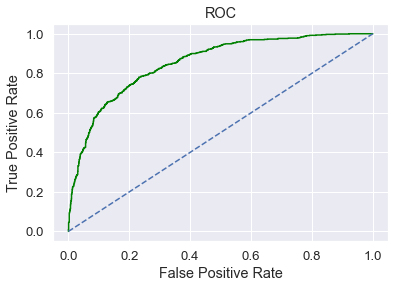

In [195]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

In [196]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[555,  50],
       [154, 141]], dtype=int64)

In [197]:
#Test Data Accuracy
rf_test_acc=best_grid_rfcl.score(x_test,test_labels)
rf_test_acc

0.7733333333333333

In [198]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.74      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [199]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.74
rf_test_recall  0.48
rf_test_f1  0.58


Area under Curve is 0.8199355652052107


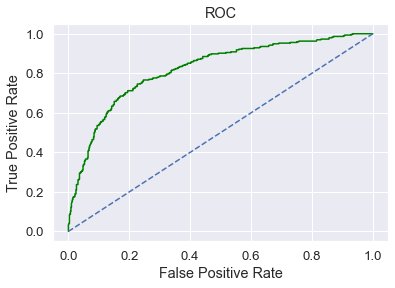

In [200]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

### Random Forest Conclusion

Train Data:
- AUC: 85%
- Accuracy: 81%
- Precision: 73%
- f1-Score: 65%

Test Data:
- AUC: 81%
- Accuracy: 77%
- Precision: 74%
- f1-Score: 58%

#### Observation

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.



## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparison of the performance metrics

In [201]:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test
Accuracy,0.79,0.77,0.81,0.77
AUC,0.83,0.79,0.85,0.82
Recall,0.59,0.49,0.59,0.48
Precision,0.67,0.71,0.73,0.74
F1 Score,0.63,0.58,0.65,0.58


### ROC Curve for the models on the Training data

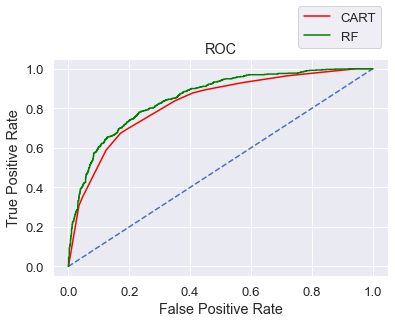

In [202]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the models on the Test data

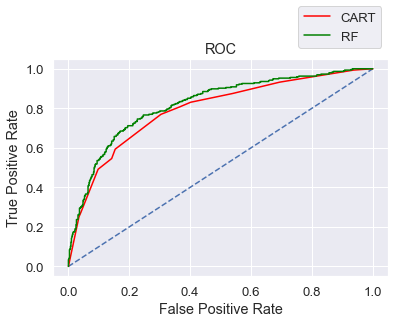

In [203]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

**CONCLUSION :**

I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better

## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Business insights:


•	After applying the supervised learning algorithm, it appears that all of the models have excellent accuracy in identifying clients who will not make a claim for travel insurance.

•	As far as we are aware, this insurance company had a higher-than-average claim frequency, and this methodology would undoubtedly aid in lowering the ratio.

•	I advise the insurance company to partner with additional Agencies in order to grow its business, as the variable Agency code appears to be the most crucial component in determining the model.

•	In order to reduce the frequency of claims, they should add some clauses to their policy's terms and conditions that would be advantageous to both the company and the clients.

•	This insurance company can choose its profitable consumers with ease using this model and customer data.

•	The team can easily focus on the clients who won't file claims for travel insurance. You only make money when returning consumers regard an organisation as being loyal and trustworthy, therefore as soon as the team receives customer data from individuals who, according to the model, have NO claim status, the team must forge strong relationships with such clients.

•	In my opinion, the travel insurance provider ought to offer more options for Product Name. They now provide Bronze, Cancellation, Customized, Gold, and Silver plans, but adding a few more to the list will entice clients to select the best plan that works best for them and, as a result, reduce the frequency of claims for the business. Additionally, doing the same would increase sales for the tour insurance company. 

•	Customers that fall under the NO claim status can be advised to purchase a product plan with a higher commission rate.


•	Customers benefited from the simplification of online interactions, which improved conversions and profitability.
•	According to research, 90% of insurance transactions take place online. • Another fascinating aspect is that virtually every offline business claims to be related; researchers need to determine why.

•	We must launch a promotional marketing campaign, train the JZI agency resources to pick up sales as they fall off, and assess whether we need to partner with another agency.

•	Additionally, the model gives us an accuracy of 80%, therefore we need customers to buy plans or airline tickets and cross-sell insurance based on the claim data pattern.
•	We must launch a promotional marketing campaign, train the JZI agency resources to pick up sales as they fall off, and assess whether we need to partner with another agency.

•	Additionally, the model gives us an accuracy of 80%, therefore we need customers to buy plane tickets or plans and cross-sell insurance based on claim data patterns.

•	Another noteworthy finding is that agencies generate more sales than airlines do, and that trend indicates that airlines handle more claims. To comprehend the workflow and why it is the way it is, we might need to dig deep into the process.

• Key performance metric (KPI) The insurance claim KPIs are:

1) Shorten the claims cycle

2) Boost client satisfaction

3) Prevent fraud

4) Increase claim reimbursement

•	Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.




Recommendations

I strongly recommended we collect more real time unstructured data and past data if possible.
This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behaviour patterns, weather information, airline/vehicle types, etc.
